In [1]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow (Recommended Way)
import tensorflow as tf

# Dataset
from tensorflow.keras.datasets import mnist

# Utilities
from tensorflow.keras.utils import to_categorical

# Model & Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 [==============================] - 3s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)

In [5]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [6]:
y_pred_lr = lr_model.predict(X_test_flat)

In [7]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9257


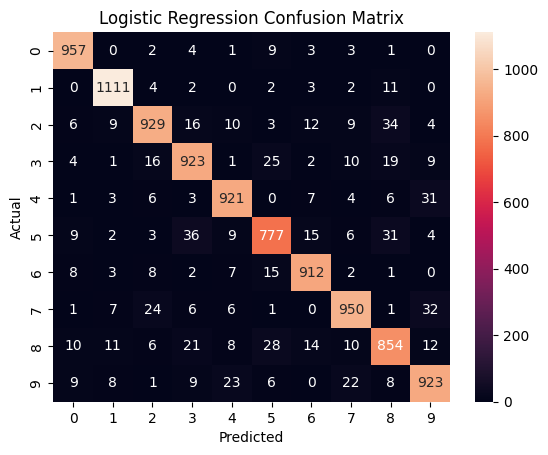

In [8]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure()
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
X_train_cnn = X_train.reshape(60000, 28, 28, 1)
X_test_cnn = X_test.reshape(10000, 28, 28, 1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [10]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [11]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [12]:
history = cnn_model.fit(X_train_cnn, y_train_cat,
                        epochs=5,
                        validation_split=0.2,
                        batch_size=64)

Epoch 1/5


750/750 [==============================] - 16s 20ms/step - loss: 0.1768 - accuracy: 0.9481 - val_loss: 0.0761 - val_accuracy: 0.9765
Epoch 2/5
750/750 [==============================] - 15s 19ms/step - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0450 - val_accuracy: 0.9870
Epoch 3/5
750/750 [==============================] - 14s 19ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0509 - val_accuracy: 0.9855
Epoch 4/5
750/750 [==============================] - 13s 18ms/step - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.0475 - val_accuracy: 0.9859
Epoch 5/5
750/750 [==============================] - 14s 18ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0450 - val_accuracy: 0.9868


In [13]:
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cat)
print("CNN Test Accuracy:", test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0355 - accuracy: 0.9891
CNN Test Accuracy: 0.9890999794006348


313/313 [==============================] - 2s 7ms/step


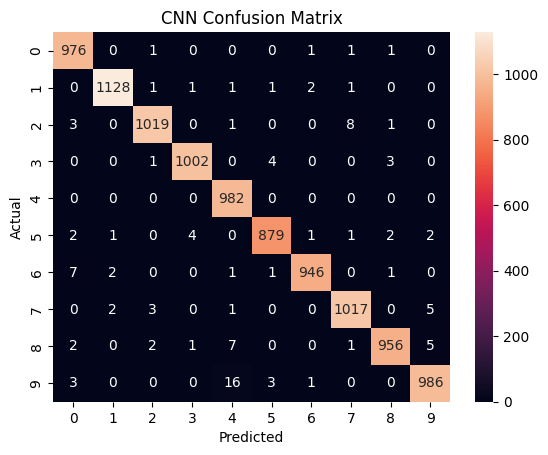

In [14]:
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

cm_cnn = confusion_matrix(y_test, y_pred_cnn)

plt.figure()
sns.heatmap(cm_cnn, annot=True, fmt='d')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

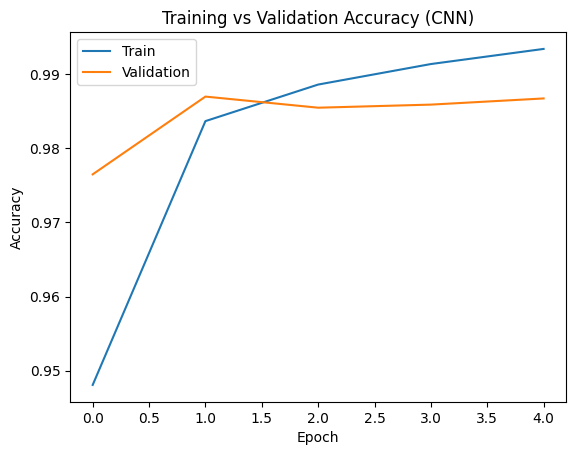

In [15]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy (CNN)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])
plt.show()